In [1]:
# Minimum spaning tree
def min_distance(distance, visited):
    min_val = float('inf')
    min_index = -1

    for i in range(len(distance)):
        if distance[i] < min_val and i not in visited:
            min_val = distance[i]
            min_index = i
    return min_index

def djikstra_algorithm(graph, start_node):
    num_nodes = len(graph)
    distance = [float('inf')] * num_nodes
    visited = []
    distance[start_node] = 0

    for i in range(num_nodes):
        current_node = min_distance(distance, visited)
        visited.append(current_node)
        for j in range(num_nodes):
            if graph[current_node][j] != 0:
                new_distance = distance[current_node] + graph[current_node][j]
                if new_distance < distance[j]:
                    distance[j] = new_distance
    return distance

graph = [[0,7,9,0,0,14],
            [7,0,10,15,0,0],
            [9,10,0,11,0,2],
            [0,15,11,0,6,0],
            [0,0,0,6,0,9],
            [14,0,2,0,9,10]]

shortest_distance = djikstra_algorithm(graph, 0)
print(shortest_distance)

[0, 7, 9, 20, 20, 11]


/tmp/ipykernel_11362/391035492.py:42: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'frames/frame_{i:03d}.png'))


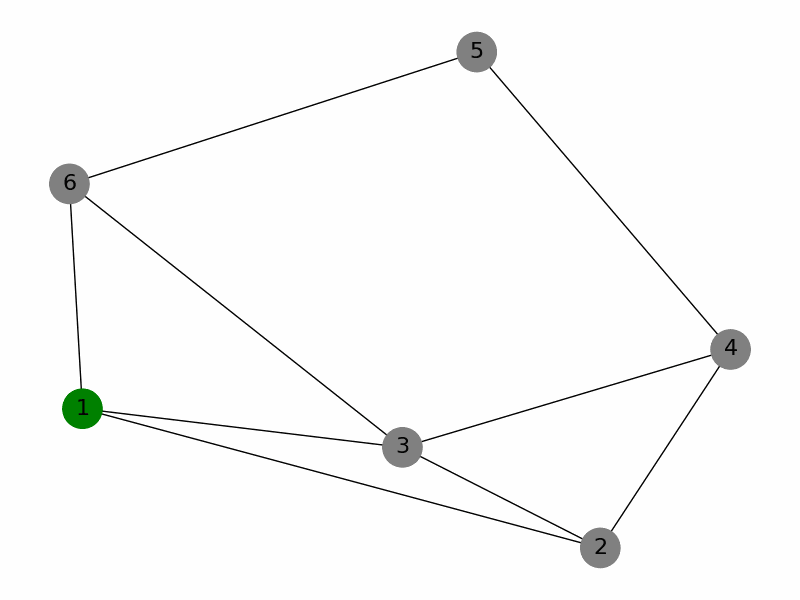

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import imageio
import os
import shutil
import heapq

def draw_graph(G, node_colors, edge_colors, pos, frame_id):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=True,node_size=800 , font_size=16)
    plt.savefig(f'frames/frame_{frame_id:03d}.png')
    plt.close()

def animate_djikstra(graph, start_node):
    os.makedirs('frames', exist_ok=True)
    frame_id = 0
    pos = nx.spring_layout(graph, seed=42)
    visited = {node: False for node in graph.nodes}
    distance = {node: float('inf') for node in graph.nodes}
    distance[start_node] = 0
    pq = [(0, start_node)]

    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if visited[current_node]:
            continue
        visited[current_node] = True

        node_colors = ['green' if node == current_node else 'red' if visited[node] else 'gray' for node in graph.nodes]
        edge_colors = ['black'for edge in graph.edges]
        draw_graph(graph, node_colors, edge_colors, pos, frame_id)
        frame_id += 1

        for neighbor, edge_weight in graph[current_node].items():
            new_distance = current_distance + edge_weight['weight']
            if not visited[neighbor] and new_distance < distance[neighbor]:
                distance[neighbor] = new_distance
                heapq.heappush(pq, (new_distance, neighbor))

    images = []
    for i in range(frame_id):
        images.append(imageio.imread(f'frames/frame_{i:03d}.png'))
    imageio.mimsave('djikstra.gif', images, duration=5)
    shutil.rmtree('frames')

G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 7), (1, 3, 9), (1, 6, 14), (2, 3, 10), (2, 4, 15), (3, 4, 11), (3, 6, 2), (4, 5, 6), (5, 6, 9)])

animate_djikstra(G, 1)
from IPython.display import Image
Image(filename='djikstra.gif')

In [ ]:
# Latihan 1

''' 
1. a. algoritma djikstra pada latihan 1 menggunakan class graph
   b. algoritma djikstra pada contoh menggunakan index berupa angka untuk node sedangkan yang latihan satu pakai nama node
   c. pada algortima djikstra contoh node disimpan dalam list visited sedangkan pada latihan 1 menggunakan list boolean
'''

In [10]:
# Latihan 2

import heapq

def min_product_path(n, edges, start, end):
    # Create adjacency list
    graph = {i: [] for i in range(1, n + 1)}
    for (u, v), weight in edges:
        graph[u].append((v, weight))
    
    # Priority queue to store (product, node)
    pq = [(1, start)]
    # Dictionary to store the minimum product to each node
    min_product = {i: float('inf') for i in range(1, n + 1)}
    min_product[start] = 1
    
    while pq:
        current_product, current_node = heapq.heappop(pq)
        
        if current_node == end:
            return current_product
        
        for neighbor, weight in graph[current_node]:
            new_product = current_product * weight
            if new_product < min_product[neighbor]:
                min_product[neighbor] = new_product
                heapq.heappush(pq, (new_product, neighbor))
    
    return -1 if min_product[end] == float('inf') else min_product[end]

# Example usage
N = 3
E = 3
edges = [((1, 2), 5), ((1, 3), 9), ((2, 3), 1)]
S = 1
D = 3

print(min_product_path(N, edges, S, D))  # Output: 5

5
